# Load Full Data Set

In [9]:
import pandas as pd
csv_file = r"E:\LargeTrain.csv"

# Load the CSV file
df = pd.read_csv(csv_file)


In [2]:
df

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
0,3,3,689,18,6,890,6,39,17,88,...,35148.0,8687.0,55835.0,9078.0,21355.0,56302.0,10380.0,171979.0,162674.0,2
1,3,3,583,15,5,1574,5,6,7,30,...,571.0,718.0,1762.0,642.0,1820.0,1675.0,1100.0,7702.0,6551.0,8
2,3,4,2796,15,5,625,5,58,11,152,...,29872.0,16910.0,31708.0,9000.0,17586.0,30719.0,30062.0,55331.0,12946.0,9
3,3,3,373,27,9,615,9,16,10,34,...,10742.0,9755.0,26992.0,9069.0,24885.0,27108.0,13219.0,122247.0,98621.0,9
4,3,3,77,12,4,66,4,3,0,5,...,962.0,1307.0,3119.0,1172.0,3522.0,3245.0,2001.0,15501.0,11864.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,3,3,1244,0,0,80,0,0,0,1,...,563.0,815.0,1488.0,646.0,1839.0,1543.0,1358.0,7543.0,6854.0,4
10864,4,4,4,0,3,0,0,8,1,11,...,636.0,831.0,1855.0,762.0,2268.0,1859.0,1914.0,9309.0,7404.0,4
10865,4,4,316,6,3,7,3,7,0,19,...,2010.0,2218.0,5277.0,2159.0,5849.0,5359.0,3138.0,24897.0,23326.0,4
10866,2,2,412,0,0,27,0,0,0,1,...,841.0,1070.0,2155.0,846.0,2437.0,2175.0,1402.0,10534.0,9948.0,4


In [8]:
 #Print all column names in one line, separated by commas
print("\nColumn names:")
print(', '.join(df.columns))


Column names:
Virtual, Offset, loc, Import, Imports, var, Forwarder, UINT, LONG, BOOL, WORD, BYTES, large, short, dd, db, dw, XREF, ptr, DATA, FUNCTION, extrn, byte, word, dword, char, DWORD, stdcall, arg, locret, asc, align, WinMain, unk, cookie, off, nullsub, DllEntryPoint, System32, dll, CHUNK, BASS, HMENU, DLL, LPWSTR, void, HRESULT, HDC, LRESULT, HANDLE, HWND, LPSTR, int, HLOCAL, FARPROC, ATOM, HMODULE, WPARAM, HGLOBAL, entry, rva, COLLAPSED, config, exe, Software, CurrentVersion, __imp_, INT_PTR, UINT_PTR, ---Seperator, PCCTL_CONTEXT, __IMPORT_, INTERNET_STATUS_CALLBACK, .rdata:, .data:, .text:, misc_case, misc_installdir, misc_market, misc_microsoft, misc_policies, misc_proc, misc_scrollwindow, misc_search, misc_trap, misc_visualc, misc1____security_cookie, misc1_assume, misc1_callvirtualalloc, misc1_exportedentry, misc1_hardware, misc1_hkey_current_user, misc1_hkey_local_machine, misc1_sp-analysisfailed, misc1_unableto, ent_q_diffs_0, ent_q_diffs_1, ent_q_diffs_2, ent_q_diffs_

# Feature Selection
The selected features were chosen based on their relevance to static malware analysis and their proven effectiveness in prior research. Opcode frequencies, byte patterns, and entropy capture structural and obfuscation-related traits, while API calls and suspicious strings provide semantic insights into malware behavior. Additional features like file size, line counts, section presence, and register usage help distinguish malware families based on complexity, packing, and structure. Together, these features from both .asm and .bytes files offer a balanced representation of low-level behavior and high-level intent, enhancing classification accuracy.

In [10]:
import pandas as pd

# === Load the dataset ===
df = pd.read_csv(r"E:\LargeTrain.csv")

# === Define feature groups to include ===
feature_prefixes = [
    'asm_commands_',     # Opcode frequencies
    'TB_',               # Byte frequencies
    'ent_',              # Entropy features
    'Entropy',           # Raw entropy
    'string_len_counts_',# String length distribution
    'misc_',             # Suspicious strings
    'line_count_asm',    # Line count in .asm
    'size_asm',          # File size
    'FileSize',          # File size from .bytes
    'regs_',             # Register usage
    'section_names_',    # Section flags
    '.text_por', '.data_por', '.bss_por', '.rdata_por',
    '.idata_por', '.rsrc_por', '.reloc_por',  # Section % presence
    'db_', 'dd_', 'dw_', 'dc_',  # Data definitions
    'Img'                # Image-based features
]

# === Example API calls (add more if needed) ===
api_calls = [
    'VirtualAlloc', 'WriteFile', 'CreateFileA', 'RegSetValueExA',
    'GetProcAddress', 'LoadLibraryA', 'CreateRemoteThread', 'CloseHandle',
    'GetLastError', 'ReadFile', 'Sleep', 'DeleteFileA', 'CreateThread',
    'ExitProcess', 'MessageBoxA'
]

# === Build final column list ===
selected_columns = []

for col in df.columns:
    if col == 'Class':
        selected_columns.append(col)
    elif any(col.startswith(prefix) for prefix in feature_prefixes):
        selected_columns.append(col)
    elif col in api_calls:
        selected_columns.append(col)

# === Store the selected feature matrix in a new DataFrame ===
df_new = df[selected_columns]

# === Optional: confirm shape or preview ===
print(f" Selected {df_new.shape[1]} columns out of {df.shape[1]}")
print(df_new.head())


 Selected 869 columns out of 1805
   misc_case  misc_installdir  misc_market  misc_microsoft  misc_policies  \
0          0                0            0               6              0   
1          0                0            0               1              0   
2          0                0            0               1              0   
3          0                0            0               1              0   
4          0                0            0               1              0   

   misc_proc  misc_scrollwindow  misc_search  misc_trap  misc_visualc  ...  \
0        172                  0            0         11             3  ...   
1         82                  0            0          1             0  ...   
2        185                  8            4          0             0  ...   
3         36                  0            0          1             0  ...   
4         33                  0            0          0             0  ...   

     Img99   Img100   Img101  Img1

#  Exploratory Data Analysis (EDA)


In [10]:
df_new

,misc_case,misc_installdir,misc_market,misc_microsoft,misc_policies,misc_proc,misc_scrollwindow,misc_search,misc_trap,misc_visualc,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
0,0,0,0,6,0,172,0,0,11,3,...,35148.0,8687.0,55835.0,9078.0,21355.0,56302.0,10380.0,171979.0,162674.0,2
1,0,0,0,1,0,82,0,0,1,0,...,571.0,718.0,1762.0,642.0,1820.0,1675.0,1100.0,7702.0,6551.0,8
2,0,0,0,1,0,185,8,4,0,0,...,29872.0,16910.0,31708.0,9000.0,17586.0,30719.0,30062.0,55331.0,12946.0,9
3,0,0,0,1,0,36,0,0,1,0,...,10742.0,9755.0,26992.0,9069.0,24885.0,27108.0,13219.0,122247.0,98621.0,9
4,0,0,0,1,0,33,0,0,0,0,...,962.0,1307.0,3119.0,1172.0,3522.0,3245.0,2001.0,15501.0,11864.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,0,0,0,1,0,36,0,0,0,0,...,563.0,815.0,1488.0,646.0,1839.0,1543.0,1358.0,7543.0,6854.0,4
10864,0,0,0,1,0,2,0,0,0,0,...,636.0,831.0,1855.0,762.0,2268.0,1859.0,1914.0,9309.0,7404.0,4
10865,0,0,0,1,0,69,0,0,12,0,...,2010.0,2218.0,5277.0,2159.0,5849.0,5359.0,3138.0,24897.0,23326.0,4
10866,0,0,0,1,0,12,0,0,0,0,...,841.0,1070.0,2155.0,846.0,2437.0,2175.0,1402.0,10534.0,9948.0,4


In [11]:
df_new.describe()

,misc_case,misc_installdir,misc_market,misc_microsoft,misc_policies,misc_proc,misc_scrollwindow,misc_search,misc_trap,misc_visualc,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
count,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,...,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000
mean,39.675193,0.108024,0.035241,8.696540,0.242639,248.180530,0.356459,3.035793,3.595878,4.942124,...,10840.809901,5067.437155,19206.655962,4861.557508,13055.646853,19358.439179,7070.320482,66860.996319,53866.402926,4.017851
std,359.589035,1.698038,1.201572,31.447759,5.855670,742.803024,1.877618,98.931739,18.689323,18.002302,...,18299.174269,4215.541706,23749.881264,4084.822497,10759.321012,24745.353583,5963.469543,66364.332846,53145.701929,2.684621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,51.000000,0.000000,0.000000,0.000000,0.000000,...,1124.000000,1321.000000,3262.000000,1158.750000,3108.000000,3130.750000,1964.750000,11990.250000,7706.000000,2.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,...,5585.500000,5323.500000,14902.000000,5129.500000,14752.000000,14921.000000,7437.500000,62384.500000,45639.000000,3.000000
75%,0.000000,0.000000,0.000000,5.000000,0.000000,173.000000,0.000000,0.000000,7.000000,0.000000,...,8464.250000,6040.250000,22314.500000,6020.250000,16078.000000,21464.750000,8414.500000,73929.500000,68580.000000,6.000000
max,26592.000000,58.000000,81.000000,934.000000,324.000000,15528.000000,56.000000,9872.000000,1669.000000,227.000000,...,189297.000000,24914.000000,214551.000000,25502.000000,63895.000000,212548.000000,38582.000000,397109.000000,322765.000000,9.000000


In [12]:
 #Print all column names in one line, separated by commas
print("\nColumn names:")
print(', '.join(df.columns))


Column names:
Virtual, Offset, loc, Import, Imports, var, Forwarder, UINT, LONG, BOOL, WORD, BYTES, large, short, dd, db, dw, XREF, ptr, DATA, FUNCTION, extrn, byte, word, dword, char, DWORD, stdcall, arg, locret, asc, align, WinMain, unk, cookie, off, nullsub, DllEntryPoint, System32, dll, CHUNK, BASS, HMENU, DLL, LPWSTR, void, HRESULT, HDC, LRESULT, HANDLE, HWND, LPSTR, int, HLOCAL, FARPROC, ATOM, HMODULE, WPARAM, HGLOBAL, entry, rva, COLLAPSED, config, exe, Software, CurrentVersion, __imp_, INT_PTR, UINT_PTR, ---Seperator, PCCTL_CONTEXT, __IMPORT_, INTERNET_STATUS_CALLBACK, .rdata:, .data:, .text:, misc_case, misc_installdir, misc_market, misc_microsoft, misc_policies, misc_proc, misc_scrollwindow, misc_search, misc_trap, misc_visualc, misc1____security_cookie, misc1_assume, misc1_callvirtualalloc, misc1_exportedentry, misc1_hardware, misc1_hkey_current_user, misc1_hkey_local_machine, misc1_sp-analysisfailed, misc1_unableto, ent_q_diffs_0, ent_q_diffs_1, ent_q_diffs_2, ent_q_diffs_

# Visulization

Class counts: 1: 1541, 2: 2478, 3: 2942, 4: 475, 5: 42, 6: 751, 7: 398, 8: 1228, 9: 1013


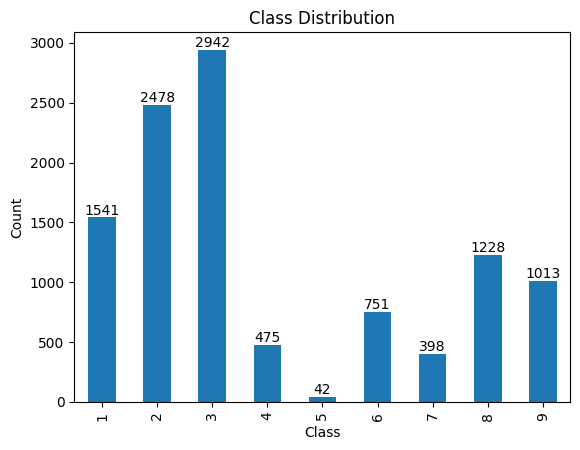

In [11]:
# Class Distribution

import matplotlib.pyplot as plt

# Count classes and sort by class label
class_counts = df_new['Class'].value_counts().sort_index()

# Print counts in a single line
print("Class counts:", ', '.join(f"{cls}: {count}" for cls, count in class_counts.items()))

# Plot bar chart
ax = class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()


The code identifies which columns in the dataset are numerical and which are categorical. It then calculates how sparse each numerical feature is by measuring the percentage of zero values. It prints the top 10 most sparse numerical features. Finally, it attempts to plot histograms for specific continuous features (like entropy and file size) to visualize their distributions.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Identify numerical and categorical columns in df_new
numerical_cols = df_new.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_new.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numerical features: {len(numerical_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

# Calculate sparsity (percentage of zeros) for numerical features in df_new
sparsity = {}
for col in numerical_cols:
    zero_count = (df_new[col] == 0).sum()
    sparsity[col] = zero_count / len(df_new) * 100  # in percentage

# Show top sparse features (most zeros)
sparse_features = sorted(sparsity.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 sparse numerical features:")
for feat, perc in sparse_features:
    print(f"{feat}: {perc:.2f}% zeros")

# Plot histogram for file_size only
if 'file_size' in df_new.columns:
    plt.figure(figsize=(6,4))
    plt.hist(df_new['file_size'].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of file_size')
    plt.xlabel('file_size')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("file_size not found in dataframe.")


Numerical features: 869
Categorical features: 0
Top 10 sparse numerical features:
misc_market: 99.84% zeros
CreateRemoteThread: 99.80% zeros
misc_installdir: 99.32% zeros
string_len_counts_99: 98.97% zeros
string_len_counts_900_1300: 98.87% zeros
string_len_counts_97: 98.83% zeros
string_len_counts_92: 98.60% zeros
string_len_counts_96: 98.57% zeros
string_len_counts_2000_3000: 98.56% zeros
string_len_counts_95: 98.55% zeros
file_size not found in dataframe.


In [13]:
# Count missing values in each column
missing_counts = df_new.isnull().sum()

# Filter to show only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

print("Columns with missing values and their counts:")
print(missing_counts)


Columns with missing values and their counts:
Series([], dtype: int64)


%%%%% Feature Importance and Interpretabiltiy: %%%%%%



It plots the distribution of entropy values, histograms of selected opcode frequencies, and bar charts showing the presence or absence of specific API calls. It helps understand feature distributions and their patterns for malware analysis or classification.

1. Entropy-based features

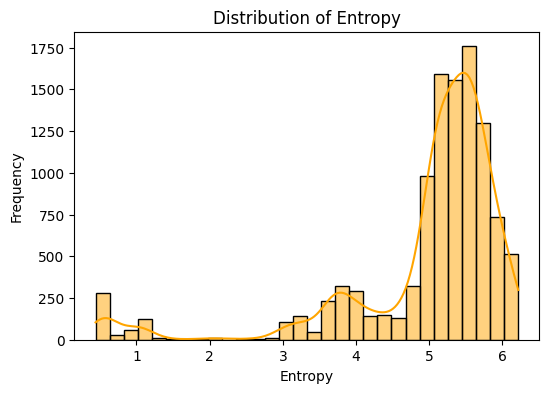

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Entropy distribution (with KDE curve) ---
if 'Entropy' in df_new.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df_new['Entropy'].dropna(), bins=30, kde=True, color='orange')
    plt.title('Distribution of Entropy')
    plt.xlabel('Entropy')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Entropy' not found")


2. Opcode frequencies

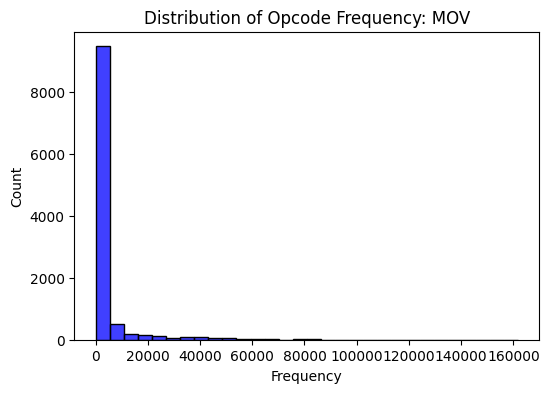

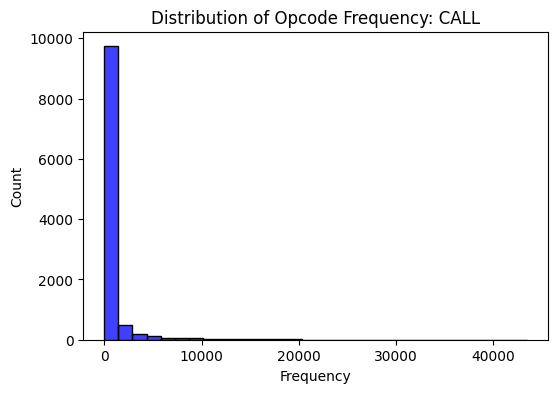

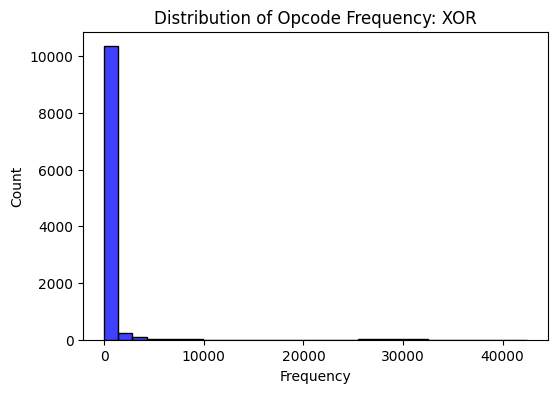

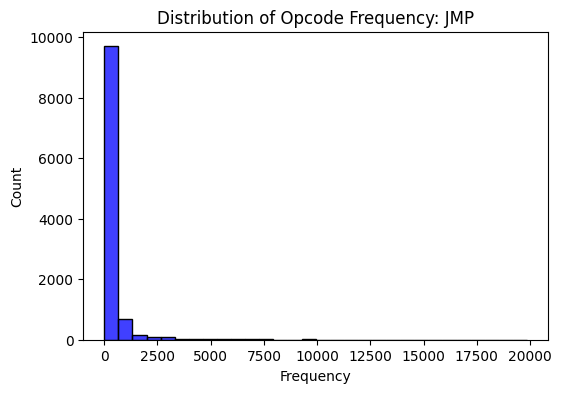

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Opcode frequency distribution for key instructions ---
opcode_features = ['asm_commands_mov', 'asm_commands_call', 'asm_commands_xor', 'asm_commands_jmp']

for opcode in opcode_features:
    if opcode in df_new.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df_new[opcode].dropna(), bins=30, color='blue')
        plt.title(f'Distribution of Opcode Frequency: {opcode.split("_")[-1].upper()}')
        plt.xlabel('Frequency')
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"Opcode feature '{opcode}' not found")


3. API call counts

C:\Users\mukes\AppData\Local\Temp\ipykernel_46536\1073296878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


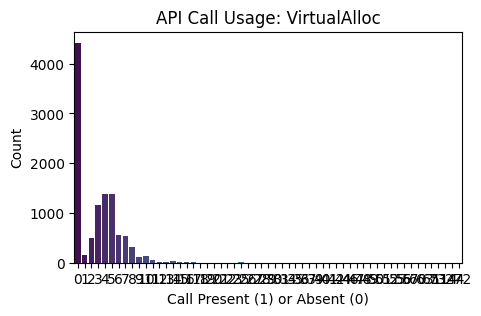

C:\Users\mukes\AppData\Local\Temp\ipykernel_46536\1073296878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


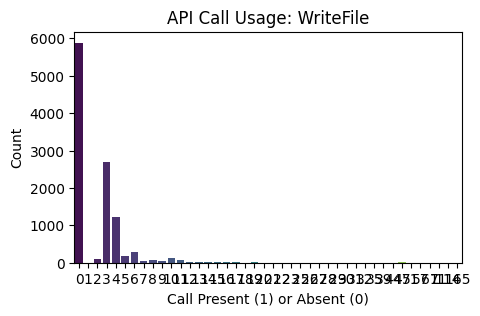

C:\Users\mukes\AppData\Local\Temp\ipykernel_46536\1073296878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


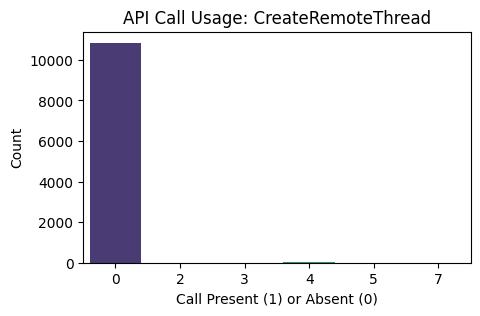

C:\Users\mukes\AppData\Local\Temp\ipykernel_46536\1073296878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


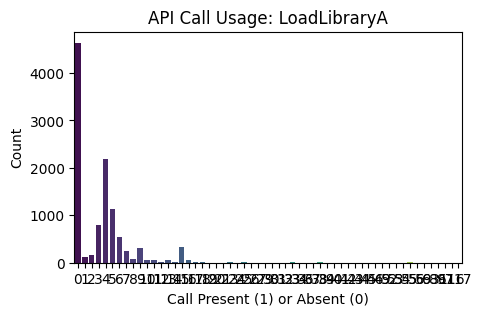

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- API call usage (binary or sparse features) ---
# Replace with actual API call feature names in your dataset
api_calls = ['VirtualAlloc', 'WriteFile', 'CreateRemoteThread', 'LoadLibraryA']

for api_call in api_calls:
    if api_call in df_new.columns:
        counts = df_new[api_call].value_counts().sort_index()
        plt.figure(figsize=(5,3))
        sns.barplot(x=counts.index, y=counts.values, palette='viridis')
        plt.title(f'API Call Usage: {api_call}')
        plt.xlabel('Call Present (1) or Absent (0)')
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"API call feature '{api_call}' not found")


4. Section-level metadata

Detected section features: ['section_names_.bss', 'section_names_.data', 'section_names_.edata', 'section_names_.idata', 'section_names_.rdata', 'section_names_.rsrc', 'section_names_.text', 'section_names_.tls', 'section_names_header']


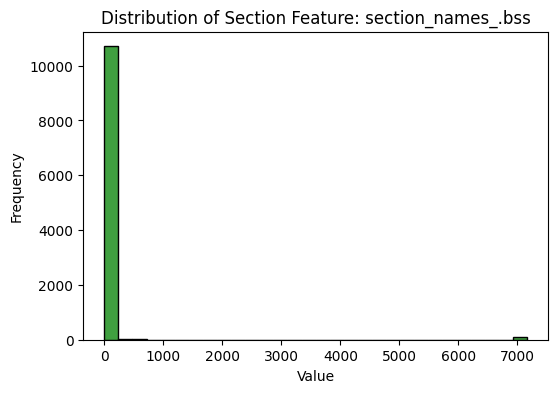

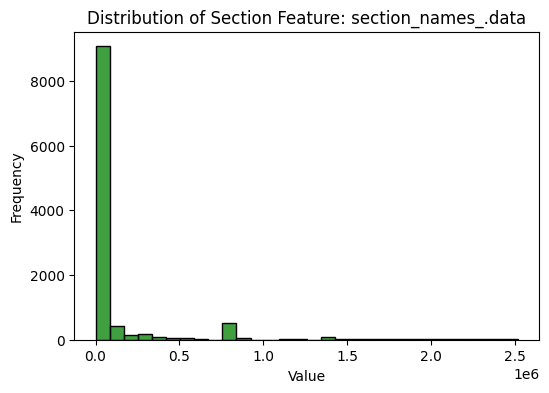

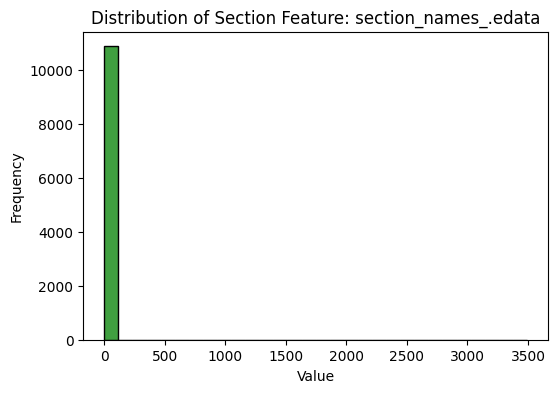

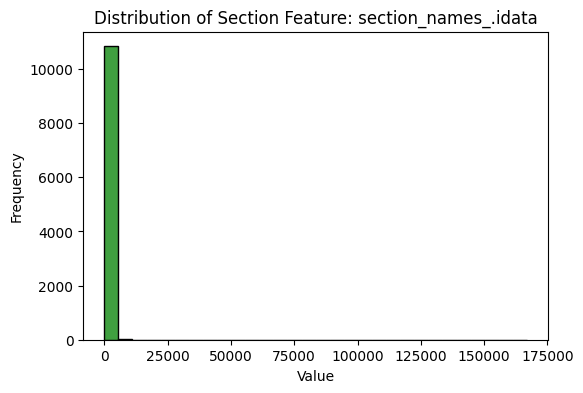

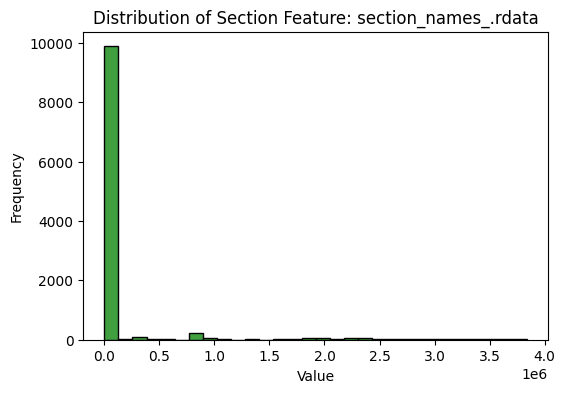

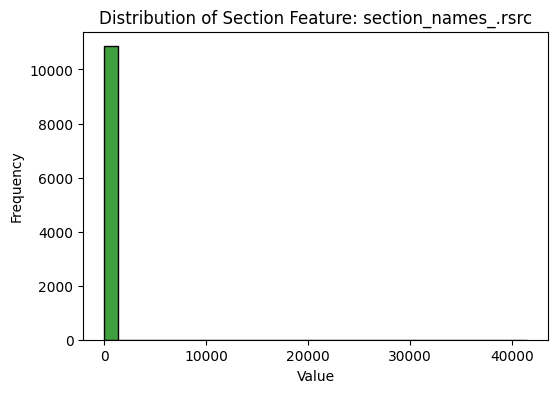

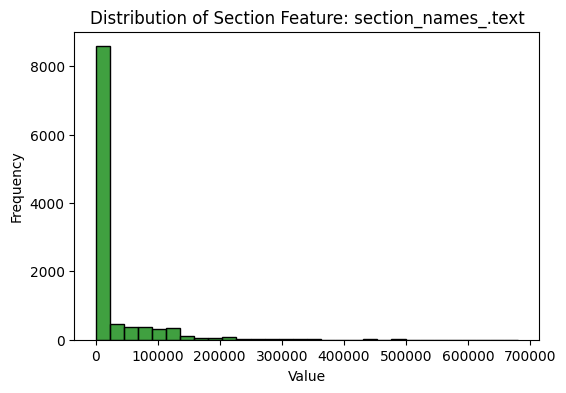

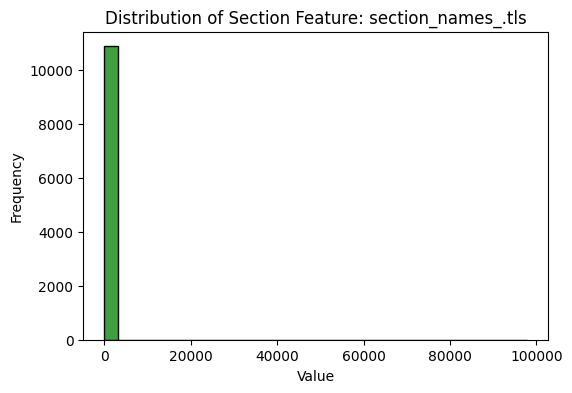

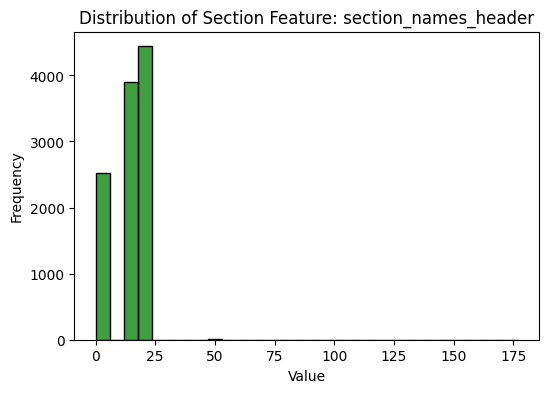

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Automatically detect section-based metadata ---
section_features = [col for col in df_new.columns if 'section' in col.lower()]

print(f"Detected section features: {section_features}")

if section_features:
    for section in section_features:
        plt.figure(figsize=(6,4))
        sns.histplot(df_new[section].dropna(), bins=30, color='green')
        plt.title(f'Distribution of Section Feature: {section}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()
else:
    print("No section-based features found in the dataframe.")


5. String-based features

Detected string-based features: ['misc_case', 'misc_installdir', 'misc_market', 'misc_microsoft', 'misc_policies', 'misc_proc', 'misc_scrollwindow', 'misc_search', 'misc_trap', 'misc_visualc', 'string_len_counts_1', 'string_len_counts_2', 'string_len_counts_3', 'string_len_counts_4', 'string_len_counts_5', 'string_len_counts_6', 'string_len_counts_7', 'string_len_counts_8', 'string_len_counts_9', 'string_len_counts_10', 'string_len_counts_11', 'string_len_counts_12', 'string_len_counts_13', 'string_len_counts_14', 'string_len_counts_15', 'string_len_counts_16', 'string_len_counts_17', 'string_len_counts_18', 'string_len_counts_19', 'string_len_counts_20', 'string_len_counts_21', 'string_len_counts_22', 'string_len_counts_23', 'string_len_counts_24', 'string_len_counts_25', 'string_len_counts_26', 'string_len_counts_27', 'string_len_counts_28', 'string_len_counts_29', 'string_len_counts_30', 'string_len_counts_31', 'string_len_counts_32', 'string_len_counts_33', 'string_len_counts_34', 

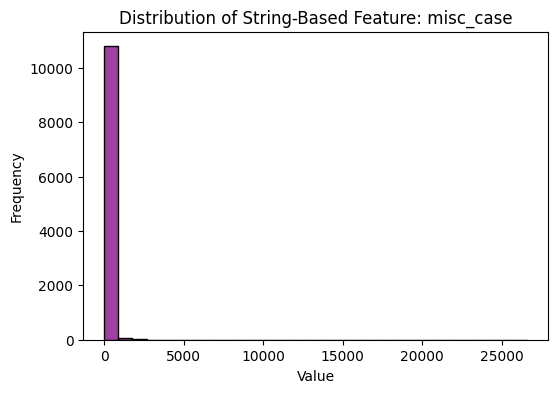

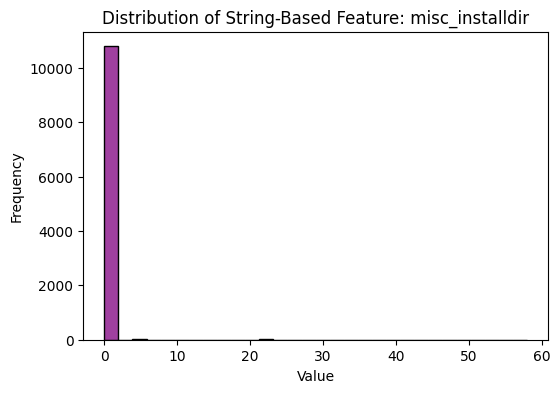

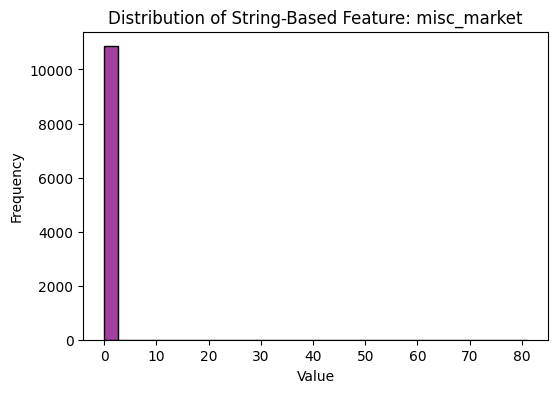

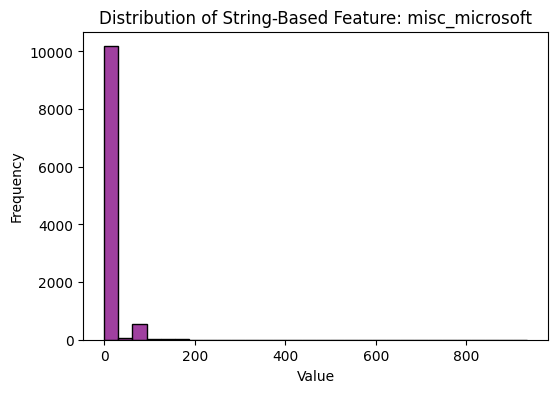

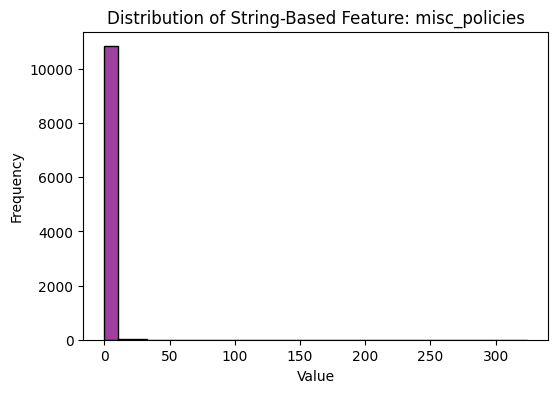

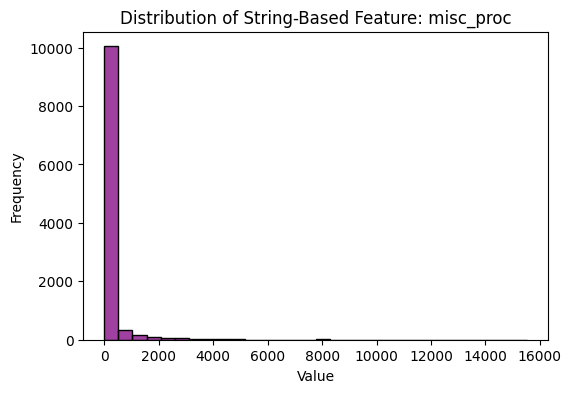

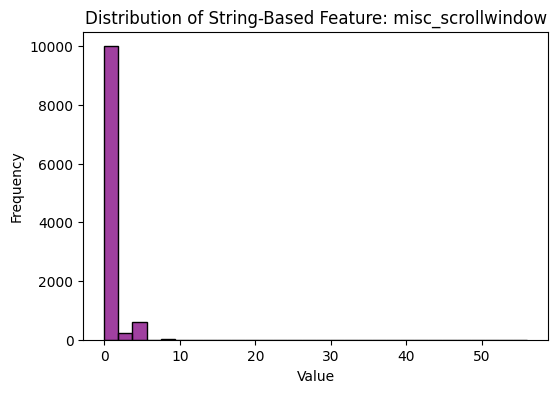

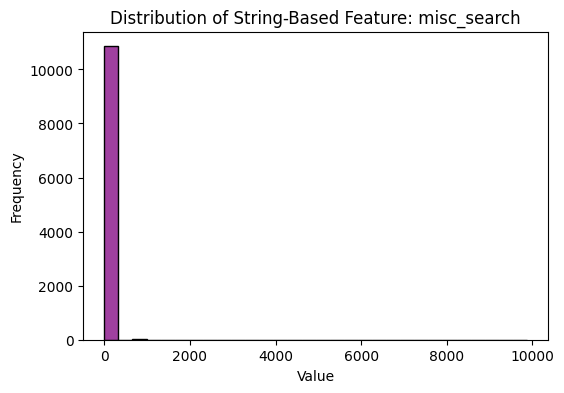

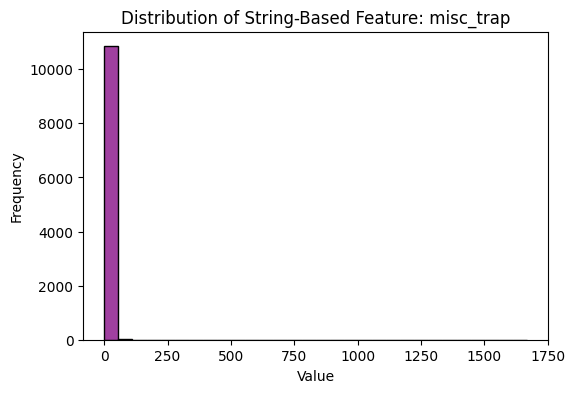

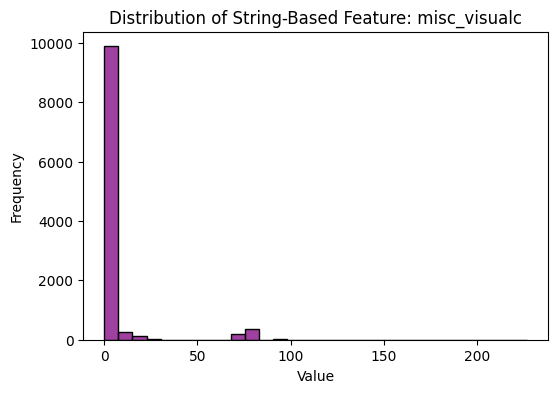

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Automatically detect string-based features ---
string_features = [col for col in df_new.columns if 'string' in col.lower() or 'misc' in col.lower()]

print(f"Detected string-based features: {string_features}")

if string_features:
    for feature in string_features[:10]:  # limit to first 10 for readability
        plt.figure(figsize=(6,4))
        sns.histplot(df_new[feature].dropna(), bins=30, color='purple')
        plt.title(f'Distribution of String-Based Feature: {feature}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()
else:
    print("No string-based features found in the dataframe.")


# Box Plot

This code creates a boxplot to visualize the distribution of file sizes (FileSize) across different categories (Class) in your dataset df_new. It helps compare file size variations and detect outliers within each class, aiding in understanding how file size differs by malware or benign classes.

C:\Users\mukes\AppData\Local\Temp\ipykernel_46536\3924578059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new, x='Class', y='FileSize', palette='Set2')


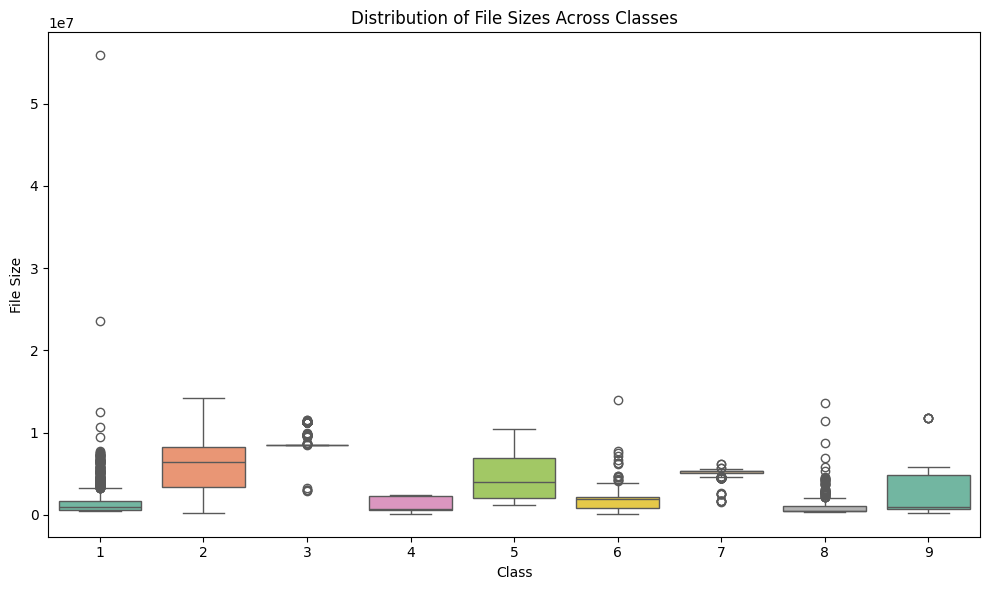

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, x='Class', y='FileSize', palette='Set2')
plt.title("Distribution of File Sizes Across Classes")
plt.xlabel("Class")
plt.ylabel("File Size")
plt.tight_layout()
plt.show()


This code calculates and visualizes the average file size for each malware class. It groups the data by class, computes the mean file size, and then creates a bar plot showing these averages with labels on top of each bar for clarity. This helps to understand how file sizes differ across malware categories, which can be useful for data exploration and feature analysis.

C:\Users\mukes\AppData\Local\Temp\ipykernel_46536\4031339961.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='FileSize', data=mean_size_by_class, palette='crest')


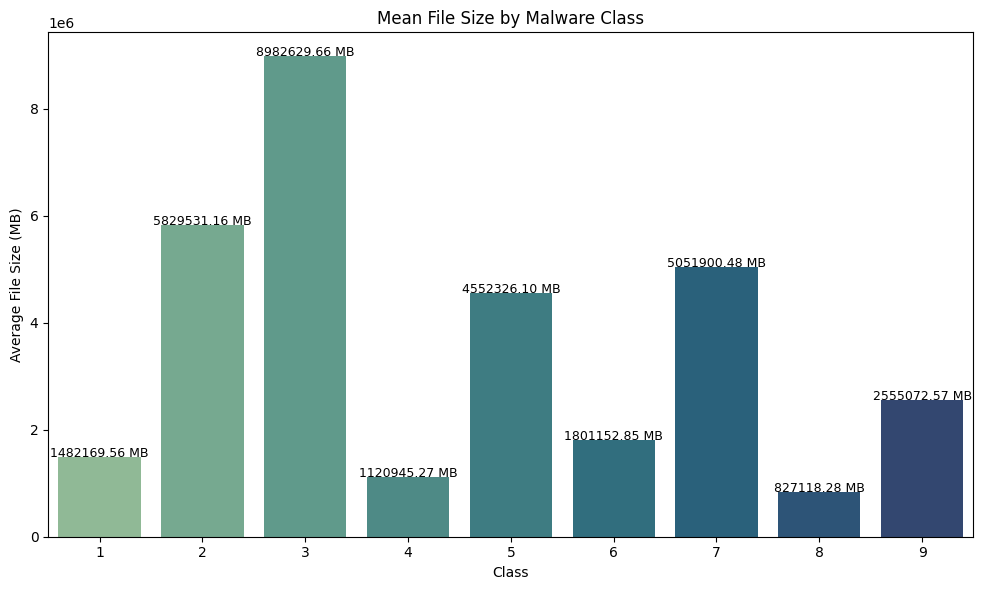

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean file size for each malware class
mean_size_by_class = df_new.groupby('Class')['FileSize'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='FileSize', data=mean_size_by_class, palette='crest')
plt.title("Mean File Size by Malware Class")
plt.ylabel("Average File Size (MB)")

# Annotate bars with exact values
for idx, row in mean_size_by_class.iterrows():
    plt.text(x=idx, y=row['FileSize'] + 0.1, s=f"{row['FileSize']:.2f} MB", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


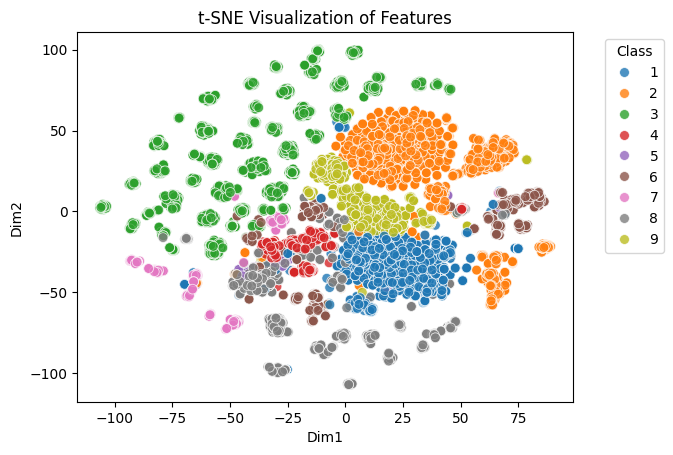

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd

# Features/labels
X = df.drop(columns=['ID', 'Class'], errors='ignore').select_dtypes(include='number').fillna(0)
y = df['Class']

# Scale + t-SNE
X_scaled = StandardScaler().fit_transform(X)
X_tsne = TSNE(n_components=2, perplexity=30, max_iter=1000,
              random_state=42, learning_rate='auto').fit_transform(X_scaled)

# Plot
tsne_df = pd.DataFrame(X_tsne, columns=['Dim1','Dim2'])
tsne_df['Class'] = y
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='Class',
                palette=sns.color_palette("tab10", 9), s=50, alpha=0.8)
plt.title("t-SNE Visualization of Features")
plt.legend(title="Class", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


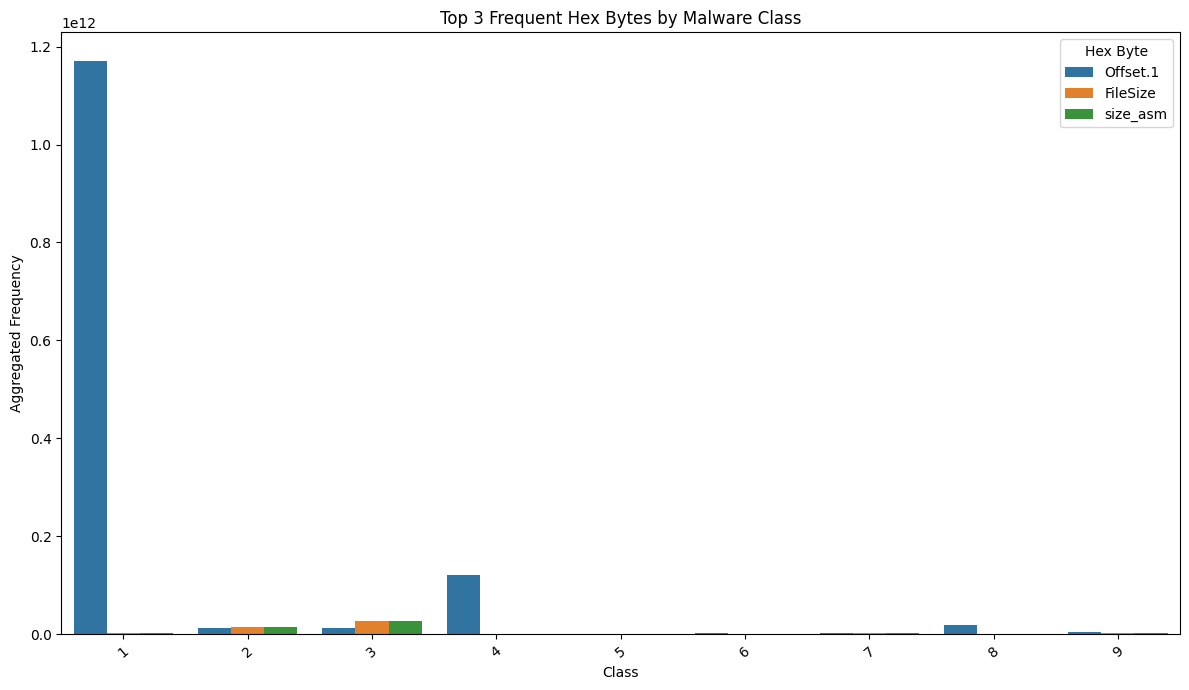

In [22]:
# analyzes and visualizes the most frequent hex byte patterns for each malware class.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify hex frequency columns (excluding metadata and unwanted columns)
hex_freq_cols = [c for c in df.columns if c not in ['ID', 'Class', 'size', '??', '00']]

# Calculate total frequency of each hex value per malware class
class_hex_totals = df.groupby('Class')[hex_freq_cols].sum()

# Collect top 3 hex bytes for each class based on total frequency
top_hex_data = []
for malware_class in class_hex_totals.index:
    highest_freq_hexes = class_hex_totals.loc[malware_class].nlargest(3)
    for hex_byte, total_freq in highest_freq_hexes.items():
        top_hex_data.append({'Class': malware_class, 'HexByte': hex_byte, 'Frequency': total_freq})

top_hex_df = pd.DataFrame(top_hex_data)

# Plot top hex bytes frequency per class using seaborn barplot
plt.figure(figsize=(12, 7))
sns.barplot(data=top_hex_df, x='Class', y='Frequency', hue='HexByte')
plt.title('Top 3 Frequent Hex Bytes by Malware Class')
plt.ylabel('Aggregated Frequency')
plt.xticks(rotation=40)
plt.legend(title='Hex Byte')
plt.tight_layout()
plt.show()


# Feature Importance and Selection



All Feature Importances:
section_names_header            0.017548
TB_a9                           0.017142
section_names_.rsrc             0.015903
ent_q_diff_diffs_1_median       0.013246
dc_por                          0.012935
                                  ...   
string_len_counts_2000_3000     0.000000
string_len_counts_6000_15000    0.000000
misc_market                     0.000000
misc_scrollwindow               0.000000
misc_installdir                 0.000000
Length: 868, dtype: float64

Selected 436 features covering 95% of total importance.


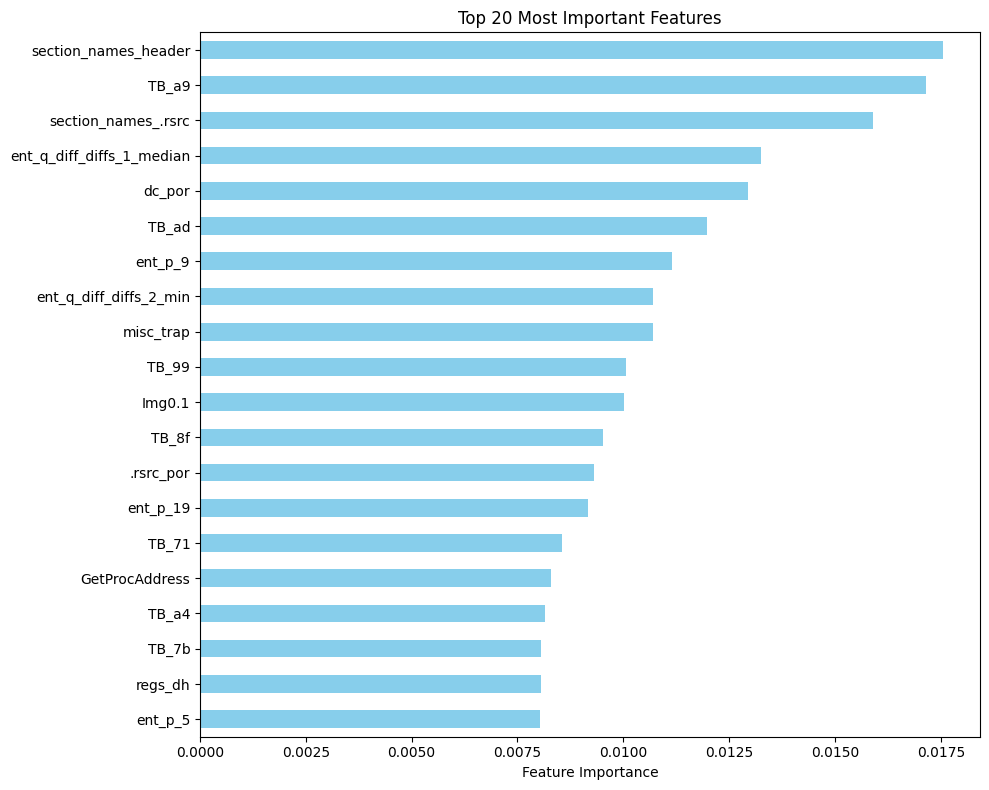

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Prepare Data ---
# Drop target column
X = df_new.drop(columns=["Class"])
y = df_new["Class"]

# Drop constant columns (no variation)
X = X.loc[:, X.nunique() > 1]

# Normalize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# --- Step 2: Train Random Forest ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# --- Step 3: Get Feature Importances ---
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Print all feature importances
print("\nAll Feature Importances:")
print(importances_sorted)

# --- Step 4: Select features covering 95% of total importance ---
cumulative_importance = importances_sorted.cumsum()
selected_features = cumulative_importance[cumulative_importance <= 0.95].index

print(f"\nSelected {len(selected_features)} features covering 95% of total importance.")

# --- Step 5: Visualize Top 20 Features ---
plt.figure(figsize=(10, 8))
importances_sorted.head(20).plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


In [24]:
# Create a new DataFrame with only the selected features
X_selected = X_scaled[selected_features]

# Optionally, keep target (Class) as a separate variable
y_selected = y

# Now you can use X_selected and y_selected for model training, etc.
print(f"Reduced feature set shape: {X_selected.shape}")


Reduced feature set shape: (10868, 436)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected,
    test_size=0.2,
    stratify=y_selected,
    random_state=42
)

# ------------------------
# Take 10 samples from test set for model testing
# ------------------------
x_model_test = X_test.sample(n=10, random_state=42)
y_model_test = y_test.loc[x_model_test.index]

# ------------------------
# Print shape confirmation
# ------------------------
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"x_model_test shape: {x_model_test.shape}")   # should be 10 samples
print(f"y_model_test shape: {y_model_test.shape}")   # should be 10 labels


X_train shape: (8694, 436)
X_test shape: (2174, 436)
y_train shape: (8694,)
y_test shape: (2174,)
x_model_test shape: (10, 436)
y_model_test shape: (10,)


Heat Map : This code generates a correlation heatmap for the top 30 most important features in your dataset. It first selects the top 30 features based on their importance scores, extracts them from the scaled dataset, and computes their correlation matrix. The heatmap then visualizes these correlations using a color scale, where red indicates strong positive correlation, blue indicates strong negative correlation, and lighter colors show weaker relationships. The result helps to understand how the most influential features are related to one another.

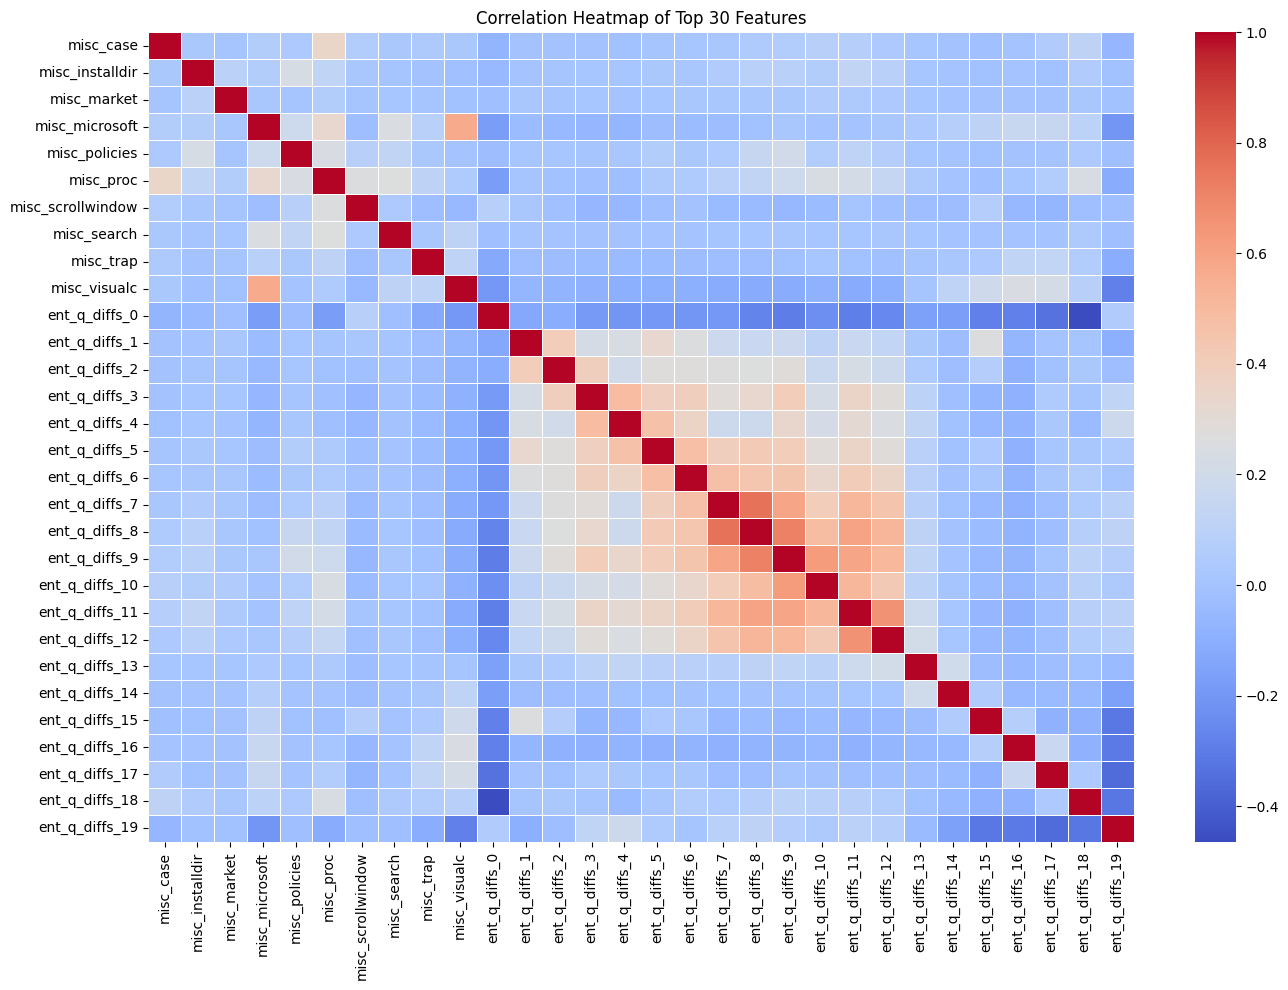

In [26]:
# visualizes the relationships (correlations) among the top 30 important features using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 30 most important features from the existing selection
top_30_features = importances.head(30).index.tolist()

# Create a DataFrame with only those features (from scaled data)
heatmap_data = X_scaled[top_30_features]

# Compute correlation matrix
corr_matrix = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Top 30 Features")
plt.tight_layout()
plt.show()


In [ ]:
# # Assuming you already have 'top_30_features' and 'df_new' from previous steps
# X_top30 = df_new[top_30_features]
# y_top30 = df_new["Class"]

# Combine for model input
# df1 = X_top30.copy()
# df1["Class"] = y_top30


# Models: Random Forest, SVM and XGBoost

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       308
           2       1.00      1.00      1.00       496
           3       1.00      1.00      1.00       588
           4       1.00      1.00      1.00        95
           5       1.00      0.88      0.93         8
           6       1.00      1.00      1.00       150
           7       1.00      1.00      1.00        80
           8       1.00      0.98      0.99       246
           9       1.00      1.00      1.00       203

    accuracy                           1.00      2174
   macro avg       1.00      0.98      0.99      2174
weighted avg       1.00      1.00      1.00      2174



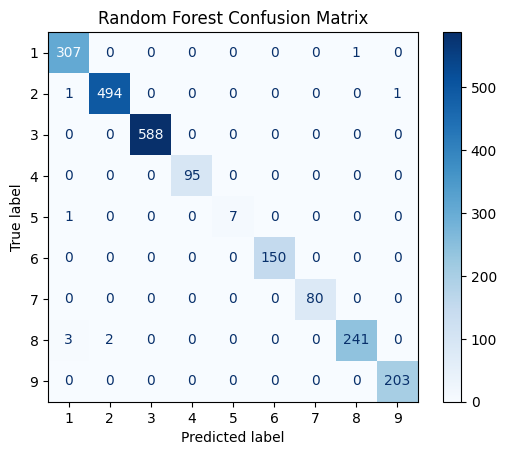

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()


SVM Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       308
           2       0.95      1.00      0.97       496
           3       1.00      0.99      1.00       588
           4       0.99      1.00      0.99        95
           5       1.00      0.62      0.77         8
           6       0.99      0.98      0.99       150
           7       0.96      0.99      0.98        80
           8       0.98      0.97      0.97       246
           9       0.99      0.95      0.97       203

    accuracy                           0.98      2174
   macro avg       0.98      0.94      0.96      2174
weighted avg       0.98      0.98      0.98      2174



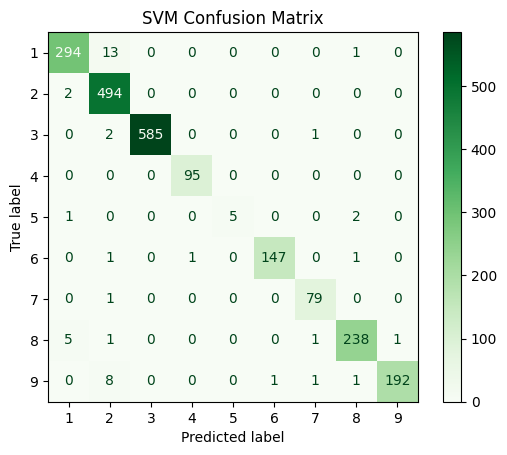

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap=plt.cm.Greens)
plt.title('SVM Confusion Matrix')
plt.show()


In [66]:
# import joblib

# # Assuming your trained XGBoost model is called `xgb_clf`
# # Save the model to a file
# joblib.dump(xgb_clf, "xgb_microsoft_model.pkl")

# print("Model saved successfully as xgb_microsoft_model.pkl")


In [67]:
# import joblib

# # Load pre-trained XGBoost model
# xgb_clf = joblib.load("xgb_microsoft_model.pkl")


C:\Users\mukes\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [01:56:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       308
           2       1.00      1.00      1.00       496
           3       1.00      1.00      1.00       588
           4       1.00      1.00      1.00        95
           5       1.00      0.88      0.93         8
           6       1.00      1.00      1.00       150
           7       1.00      1.00      1.00        80
           8       0.99      0.99      0.99       246
           9       1.00      1.00      1.00       203

    accuracy                           1.00      2174
   macro avg       1.00      0.98      0.99      2174
weighted avg       1.00      1.00      1.00      2174



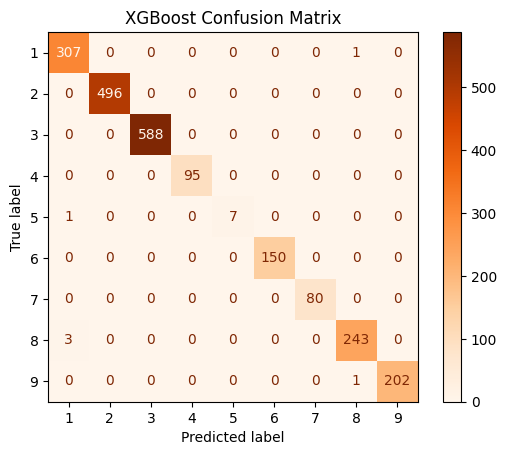

XGBoost model and label encoder saved successfully!


In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import xgboost as xgb

# Initialize label encoder
label_enc = LabelEncoder()

# Fit encoder on full target, transform train and test labels
y_train_encoded = label_enc.fit_transform(y_train)
y_test_encoded = label_enc.transform(y_test)

# Train XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_xgb_encoded = xgb_clf.predict(X_test)

# Decode predictions back to original labels (optional)
y_pred_xgb_orig = label_enc.inverse_transform(y_pred_xgb_encoded)

# Print classification report using original labels
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb_orig))

# Plot confusion matrix with original labels
cm_xgb = confusion_matrix(y_test, y_pred_xgb_orig)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=label_enc.classes_)
disp_xgb.plot(cmap=plt.cm.Oranges)
plt.title('XGBoost Confusion Matrix')
plt.show()


import joblib

# ------------------------
# Save the trained XGBoost model
# ------------------------
joblib.dump(xgb_clf, "xgb_microsoft_model_encoded.pkl")

# ------------------------
# Optional: save the label encoder as well
# ------------------------
joblib.dump(label_enc, "label_encoder.pkl")

print("XGBoost model and label encoder saved successfully!")



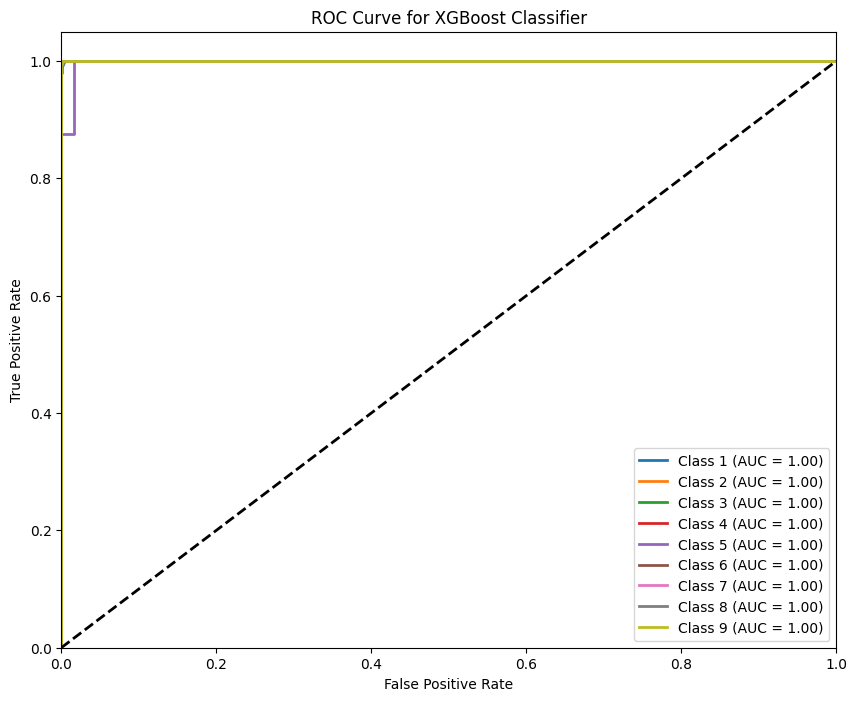

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Use the same label encoder you defined previously
classes = label_enc.classes_

# Binarize the test labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for each class
y_score = xgb_clf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()


ROC Curve for Random Forest

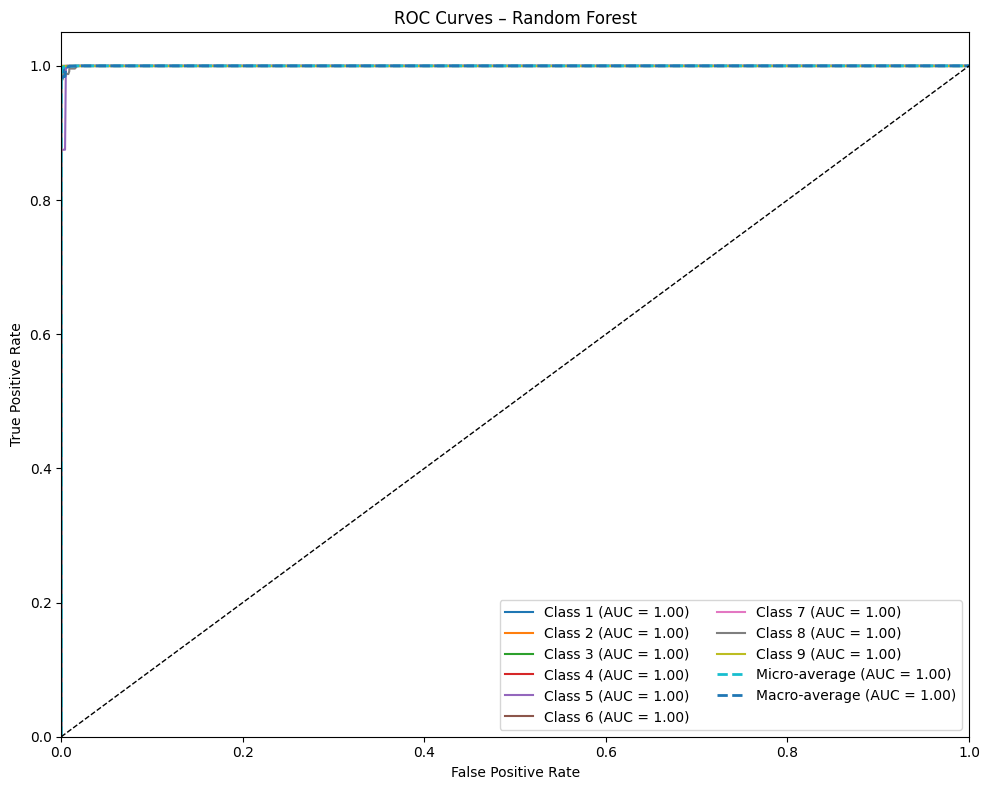

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Ensure no NaNs
X_test_rf = X_test.fillna(0)

# Probabilities & class order from the trained RF model
rf_classes = rf_model.classes_
rf_proba   = rf_model.predict_proba(X_test_rf)

# Binarize true labels to match rf_classes order
y_test_bin = label_binarize(y_test, classes=rf_classes)
n_classes  = y_test_bin.shape[1]

# Per-class ROC
fpr = {}; tpr = {}; roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), rf_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(10, 8))
for i, cls in enumerate(rf_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label=f'Class {cls} (AUC = {roc_auc[i]:.2f})')
plt.plot(fpr["micro"], tpr["micro"], '--', lw=2, label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})')
plt.plot(fpr["macro"], tpr["macro"], '--', lw=2, label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0, 1]); plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curves – Random Forest')
plt.legend(loc='lower right', ncol=2)
plt.tight_layout()
plt.show()


ROC Curves for SVM

In [34]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42).fit(X_train.fillna(0), y_train)


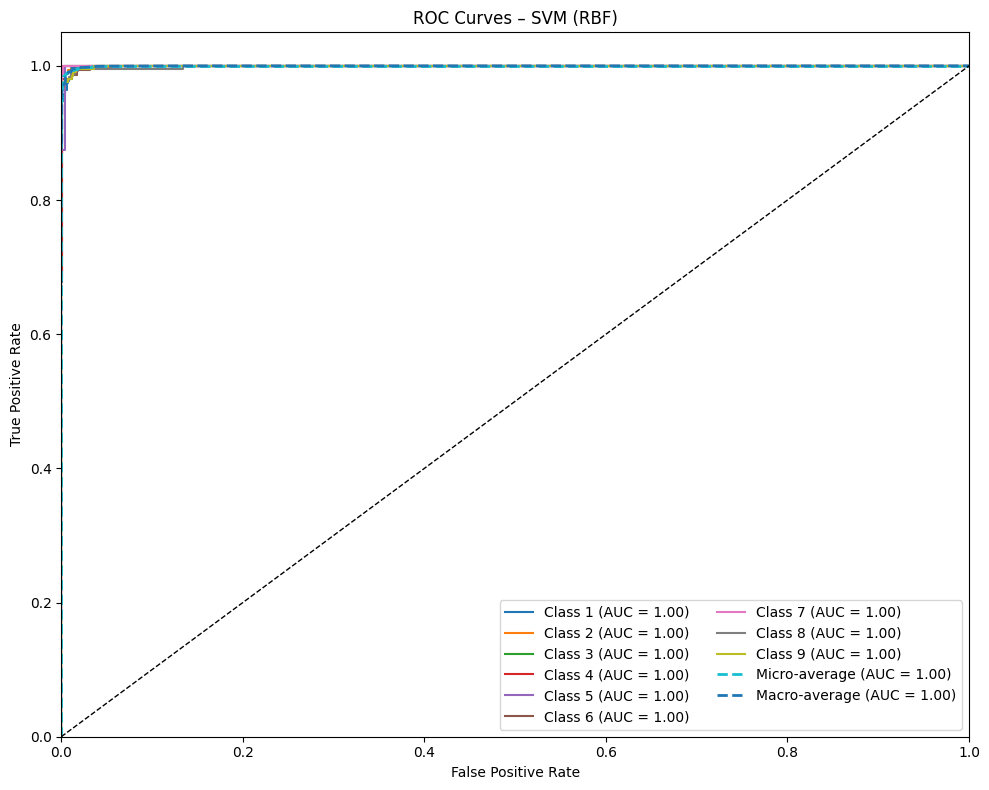

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Ensure no NaNs
X_test_svm = X_test.fillna(0)

# Probabilities & class order from the trained SVM model
svm_classes = svm_model.classes_
svm_proba   = svm_model.predict_proba(X_test_svm)

# Binarize true labels to match svm_classes order
y_test_bin = label_binarize(y_test, classes=svm_classes)
n_classes  = y_test_bin.shape[1]

# Per-class ROC
fpr = {}; tpr = {}; roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], svm_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), svm_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(10, 8))
for i, cls in enumerate(svm_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5, label=f'Class {cls} (AUC = {roc_auc[i]:.2f})')
plt.plot(fpr["micro"], tpr["micro"], '--', lw=2, label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})')
plt.plot(fpr["macro"], tpr["macro"], '--', lw=2, label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0, 1]); plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curves – SVM (RBF)')
plt.legend(loc='lower right', ncol=2)
plt.tight_layout()
plt.show()


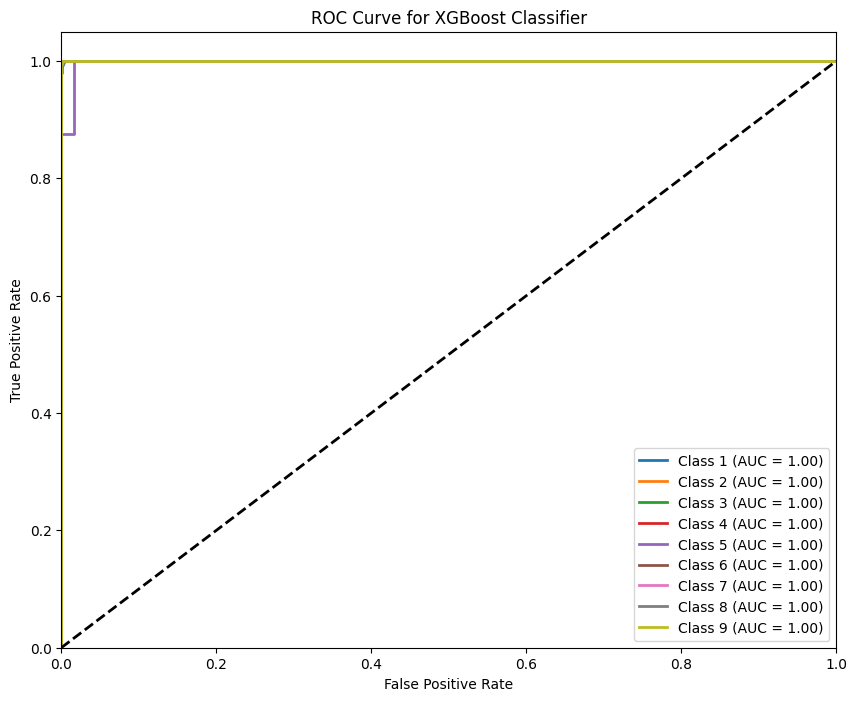

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Use the same label encoder you defined previously
classes = label_enc.classes_

# Binarize the test labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for each class
y_score = xgb_clf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()


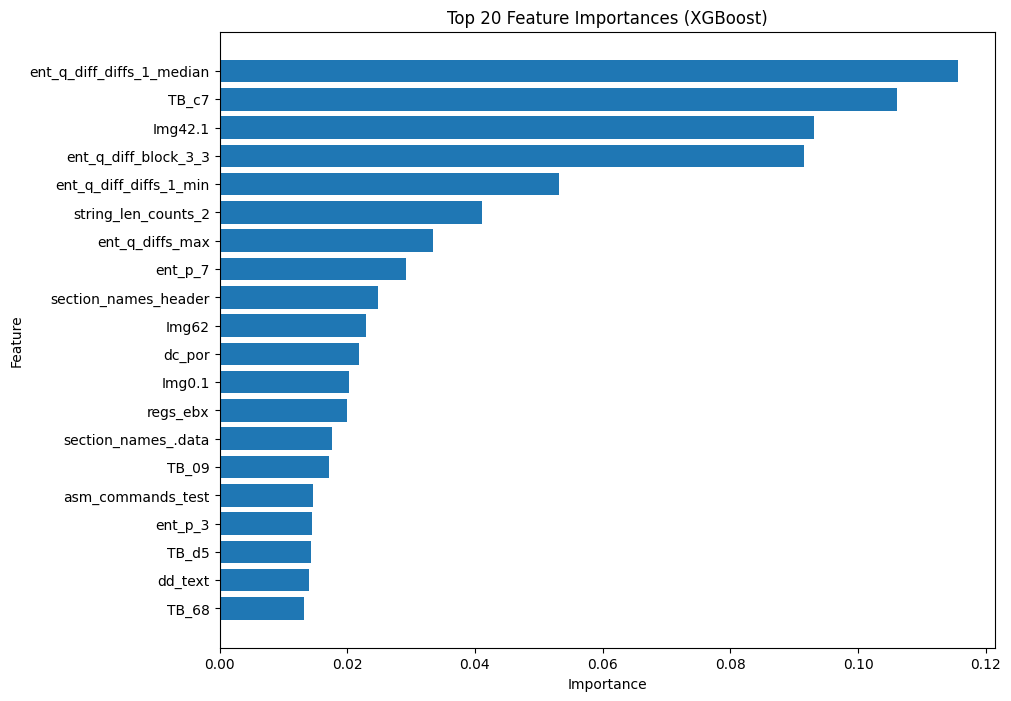

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from your trained XGBoost model
importances = xgb_clf.feature_importances_
feature_names = X_train.columns  # make sure X_train is a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot top 20 most important features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.show()


In [44]:
import joblib
import pandas as pd

# ------------------------
# Load the saved model and label encoder (correct files!)
# ------------------------
xgb_clf_loaded = joblib.load(r"E:\xgb_microsoft_model_encoded.pkl")  # XGBoost model
label_enc_loaded = joblib.load(r"E:\label_encoder.pkl")              # LabelEncoder

# ------------------------
# Take a 10-sample test set
# ------------------------
x_model_test = X_test.sample(n=10, random_state=42)
y_model_test = y_test.loc[x_model_test.index]

# ------------------------
# Predict with the model
# ------------------------
y_pred_encoded = xgb_clf_loaded.predict(x_model_test)  # uses XGBoost model

# Decode predictions with label encoder
y_pred = label_enc_loaded.inverse_transform(y_pred_encoded)

# ------------------------
# Create results table
# ------------------------
results_summary = pd.DataFrame({
    "Sample_Index": y_model_test.index,
    "Actual_Class": y_model_test.values,
    "Predicted_Class": y_pred
})
results_summary["Correct"] = results_summary["Actual_Class"] == results_summary["Predicted_Class"]

print("Model Predictions on 10-sample test set:")
print(results_summary)


Model Predictions on 10-sample test set:
   Sample_Index  Actual_Class  Predicted_Class  Correct
0          1610             3                3     True
1          7299             1                1     True
2          2207             3                3     True
3          5946             2                2     True
4          3331             1                1     True
5          6147             3                3     True
6          4214             9                9     True
7          7479             6                6     True
8          6075             1                1     True
9          3031             3                3     True


ROC Curve for Random Forest